In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../")

In [39]:
def State_value_function(ph,gamma=1,theta=0.0001):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    N=100
    r = np.zeros(N+1)
    r[N] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    
    #V0 = np.zeros(N+1)
    V = np.ones(N+1)
    S = range(1, N) # Stakes set. Your minimum bet is 1, maximum bet is min(s, N-s).
    policy = np.ones(N+1)
    policy[0]=0
    policy[N]=0
    delta = 0
    while True:
        
        for s in S:
            v = V[s]
            V[s]=ph*(r[s+int(policy[s])]+V[s+int(policy[s])]*gamma)+(1-ph)*(r[s-int(policy[s])]+V[s-int(policy[s])]*gamma)
            #print("V= ", V)
            # Stopping condition
            # Update each state...
                # Calculate delta across all states seen so far
            delta = max(delta, np.abs(v - V[s]))
            #print("d= ", delta)
                # Update the value function. Ref: Sutton book eq. 4.10.        
            # Check if we can stop 
            if delta < theta:
                break
        #print("V= ", V)        
        policy_stable=True
        for s in S:
            A=min(s,N-s)
            V0=np.zeros(N+1)
            old_action=policy[s]
            for a in range(1,A+1):
                V0[a]=ph*(r[s+a]+V[s+a]*gamma)+(1-ph)*(r[s-a]+V[s-a]*gamma)
            policy[s]=np.argmax(V0)
#             print("p= ", policy)
            if old_action!= policy[s]:
                policy_stable=False
        if policy_stable:
            break
        else:
            continue                  
    return delta, policy, V

In [40]:
delta, policy, v = State_value_function(ph=0.4,gamma=1,theta=0.0001)
print("delta:")
print(delta)
print("")
print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

delta:
0

Optimized Policy:
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimized Value Function:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]



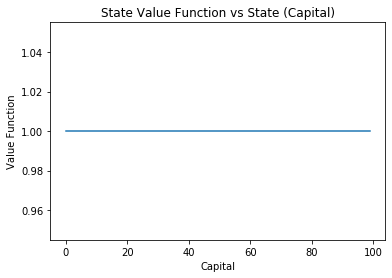

In [41]:
#Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Function')
 
# giving a title to the graph
plt.title('State Value Function vs State (Capital)')
 
# function to show the plot
plt.show()

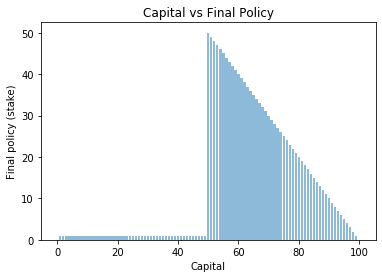

In [42]:
# Plotting Capital vs Final Policy

# x axis values
x = range(101)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5) 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()